## Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
![image.png](attachment:5a0e0d97-4380-4cb2-bf26-d0ab6ee7458a.png)

In [1]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.12dev'

## Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [3]:
wavelength =532.046 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, cut_off_intensity=2000)
df_Ne.head()

,Raman_shift (cm-1),Intensity,Ne emission line in air
1,818.699523,5000.0,556.27662
9,1117.086987,5000.0,565.66588
16,1310.480205,5000.0,571.92248
19,1398.915133,5000.0,574.82985
23,1447.564622,7000.0,576.44188


## Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for the line shift you have written down

In [124]:
ideal_split=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=1117, line2_shift=1447,
                                     cut_off_intensity=2000)
ideal_split

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,330.477634,1117.086987,1447.564622,1117,1447


## Find your files

In [125]:
path=r'G:\My Drive\Berkeley_NEW\Raman\2022_09_26_longNeLine1'
filename='spectra.txt'


In [126]:
df3=pf.get_data(path=path,
                       filename=filename, filetype='Witec_ASCII')
df3

spectra.txt


array([[1043.11 ,  712.667,  710.667, ...,  725.   ,  735.   ,  730.667],
       [1043.68 ,  705.333,  703.667, ...,  720.667,  716.   ,  720.   ],
       [1044.24 ,  705.333,  711.333, ...,  717.333,  729.333,  725.667],
       ...,
       [1591.18 ,  736.333,  736.333, ...,  741.667,  741.667,  730.333],
       [1591.68 ,  733.667,  733.333, ...,  740.333,  733.   ,  736.   ],
       [1592.19 ,  760.   ,  757.333, ...,  759.   ,  746.667,  759.   ]])

In [127]:
test=np.column_stack((df3[:, 0], df3[:, 1]))
test

array([[1043.11 ,  712.667],
       [1043.68 ,  705.333],
       [1044.24 ,  705.333],
       ...,
       [1591.18 ,  736.333],
       [1591.68 ,  733.667],
       [1592.19 ,  760.   ]])

Biggest 6 peaks:


,pos,height
64,1447.04,32873.30
56,1398.04,9411.67
80,1566.17,7702.00
11,1115.68,3782.67
30,1219.18,3074.33
40,1309.39,2327.00


selected Peak 1 Pos
1115.68
selected Peak 2 Pos
1447.04


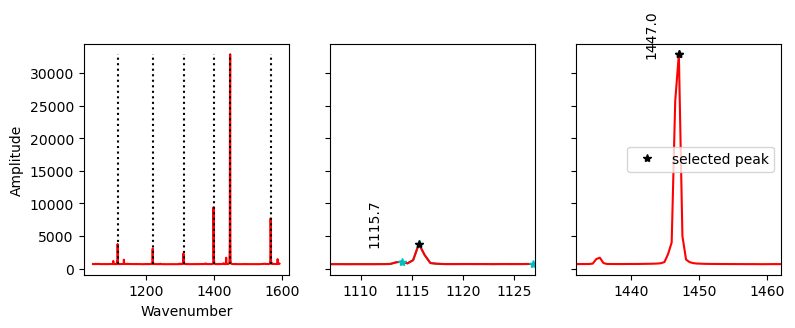

In [128]:
# Specify the approximate peak positions of the lines you are interested in
# If your drift is off the real positions, you'll have to tweak these numbers
peak1_cent=1117
peak2_cent=1447


Ne, df_sort_Ne_trim, nearest_1117, nearest_1447=pf.plot_Ne_lines(Ne_array=test,
n_peaks=6, peak1_cent=peak1_cent, peak2_cent=peak2_cent,
height=10, threshold=0.6, distance=1, prominence=10, width=1, exclude_range_1=None,
exclude_range_2=None)

## Now tweak the fit for this 1 example
- Most important things, the number of peaks you want for 1117, and the offset for this peak (LH_offset_min)
- By default, the function applies the fit to all the points inside the outermost background positions. This can be trimmed using x_span_pk1_override, and x_span_pk2_override, 

## You can tweak parameters here
- The default parameters may work, you can see what those are here:

In [129]:
pf.Ne_peak_config()

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=1, lower_bck_pk1=(-50, -25), upper_bck1_pk1=(8, 15), upper_bck2_pk1=(30, 50), lower_bck_pk2=(-44.2, -22), upper_bck1_pk2=(15, 50), upper_bck2_pk2=(50, 51), x_range_baseline=20, y_range_baseline=200, amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=(1.5, 3), x_span_pk1=None, x_span_pk2=None)

- You can also overwrite any of these, the most likely things you'll want to overwrite are the background positions, or the amplitude

In [130]:
Ne_Config=pf.Ne_peak_config(amplitude=500, LH_offset_mini=[2, 5], 
lower_bck_pk1=(-50, -30), upper_bck1_pk1=[7, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[20, 50], upper_bck2_pk2=[20, 50],
x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])
Ne_Config

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=1, lower_bck_pk1=(-50, -30), upper_bck1_pk1=[7, 13], upper_bck2_pk1=[50, 80], lower_bck_pk2=[-40, -30], upper_bck1_pk2=[20, 50], upper_bck2_pk2=[20, 50], x_range_baseline=20, y_range_baseline=200, amplitude=500, x_range_peak=15, x_range_residual=7, LH_offset_mini=[2, 5], x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])

first iteration, peak Center=1115.8005
first iteration, peak Amplitude=3401.8929
Trying to place second peak between 1110.8and1113.8
Error bars not determined by function


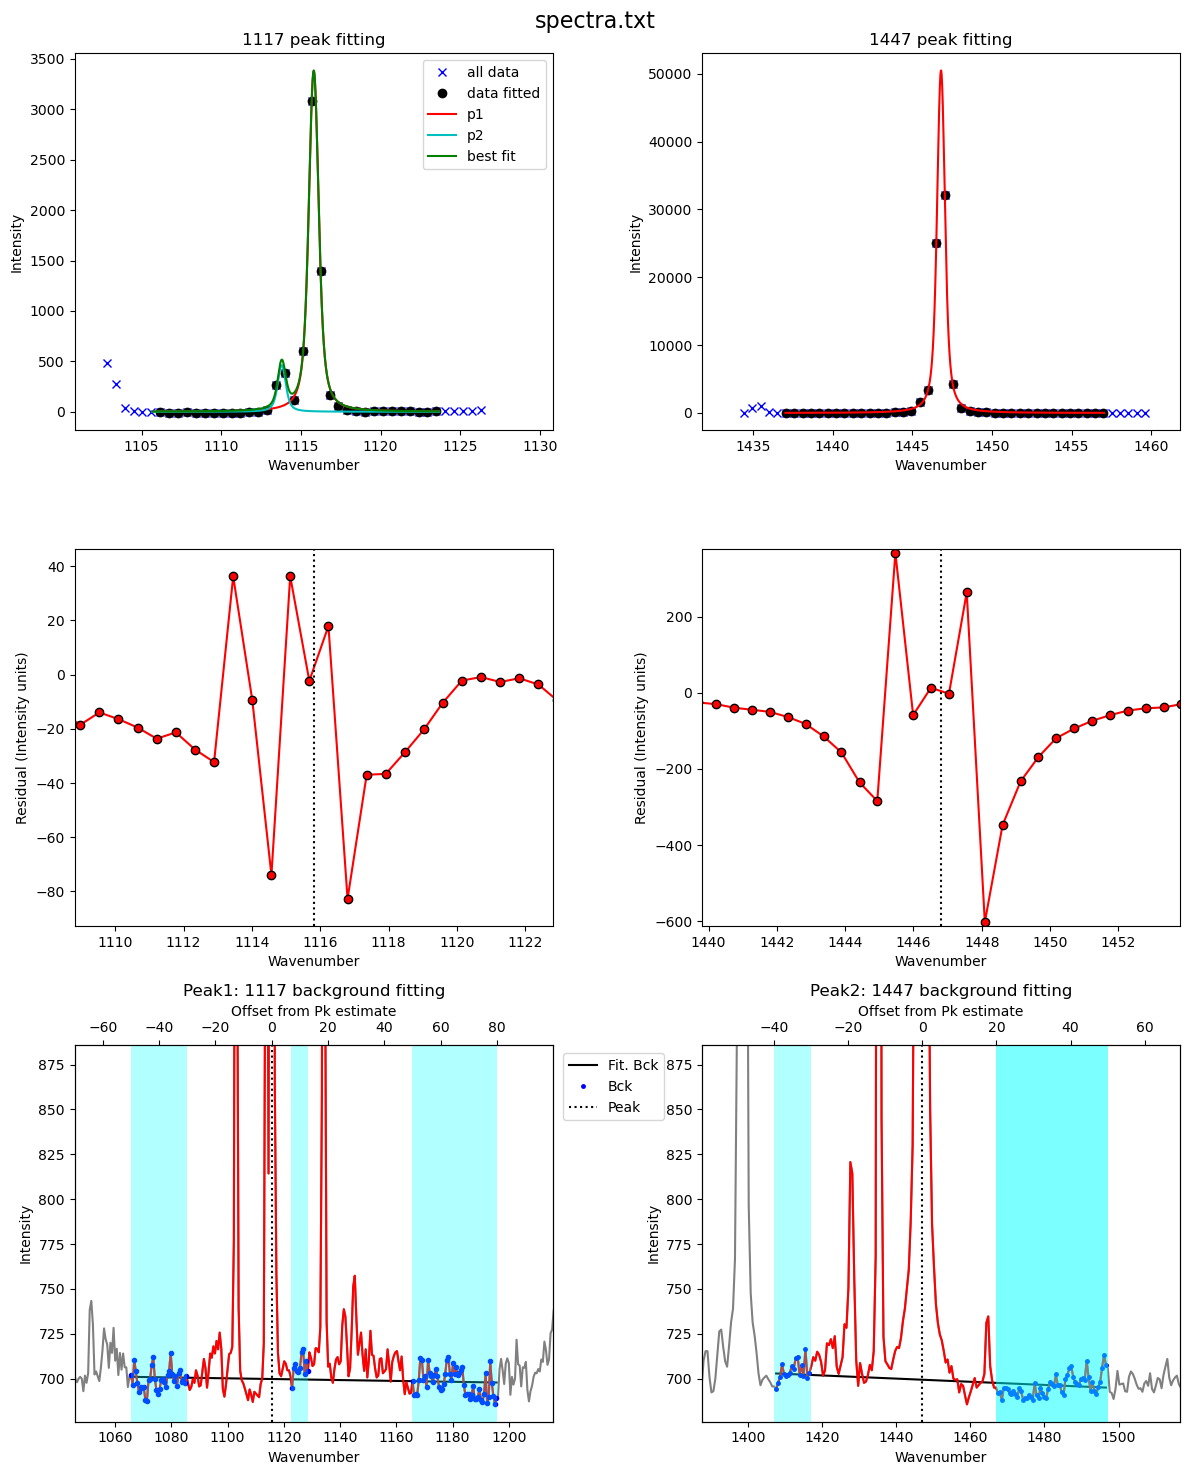

In [131]:
# You also need to set whether you want 1 peak or 2 for the LH diad
peaks_1=2

df_test, Ne_1117_reg_x_plot, Ne_1117_reg_y_plot=pf.fit_Ne_lines(  
    config=Ne_Config, peaks_1=peaks_1,
    Ne=Ne, prefix=None, path=path, filename=filename,
    Ne_center_1=nearest_1117, Ne_center_2=nearest_1447,
    DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
#config: Ne_peak_config=Ne_peak_config(),

## Now you can loop over all files using these parameters
- Most important thing you can change is plot_figure=False, much quicker, but wont save or show figures, plot_figure=True will)
- If you need, you can add other parameters in the loop here. 

In [132]:
np.shape(df3)

(1023, 181)

In [97]:
plot_figure=False # Means doesnt make figures, lot faster. 
save_excel=True # Saves to excel
save_clipboard=True # Copies to clipboard

df = pd.DataFrame([])
for i in range(0, 180):
    
    test=np.column_stack((df3[:, 0], df3[:, i+1]))
    print('working on ' + str(i))

    
    data, Ne_1117_reg_x_plot, Ne_1117_reg_y_plot=pf.fit_Ne_lines(  
    config=Ne_Config, peaks_1=peaks_1,
    Ne=test, filename=filename, path=path, prefix=None,
    Ne_center_1=nearest_1117, Ne_center_2=nearest_1447,
    DeltaNe_ideal=ideal_split['Ne_Split'], plot_figure=False) 


    df = df.append(data)
df2=df.reset_index(drop=True)




working on 0
first iteration, peak Center=1115.8005
first iteration, peak Amplitude=3401.8929
Trying to place second peak between 1110.8and1113.8
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 1
first iteration, peak Center=1115.8362
first iteration, peak Amplitude=3308.7571
Trying to place second peak between 1110.84and1113.84
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 2
first iteration, peak Center=1115.8534
first iteration, peak Amplitude=3355.7825
Trying to place second peak between 1110.85and1113.85
Error bars not determined by function
working on 3
first iteration, peak Center=1115.875
first iteration, peak Amplitude=3354.2824
Trying to place second peak between 1110.87and1113.87
Error bars not determined by function
working on 4
first iteration, peak Center=1115.8765
first iteration, peak Amplitude=3328.6703
Trying to place second peak between 1110.88and1113.88
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 5
first iteration, peak Center=1115.8808
first iteration, peak Amplitude=3311.8251
Trying to place second peak between 1110.88and1113.88
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 6
first iteration, peak Center=1115.8777
first iteration, peak Amplitude=3286.5367
Trying to place second peak between 1110.88and1113.88
Error bars not determined by function
working on 7
first iteration, peak Center=1115.8834
first iteration, peak Amplitude=3306.6181
Trying to place second peak between 1110.88and1113.88
Error bars not determined by function
working on 8
first iteration, peak Center=1115.8968
first iteration, peak Amplitude=3364.7401
Trying to place second peak between 1110.9and1113.9
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 9
first iteration, peak Center=1115.9023
first iteration, peak Amplitude=3292.3212
Trying to place second peak between 1110.9and1113.9
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 10
first iteration, peak Center=1115.9062
first iteration, peak Amplitude=3351.5961
Trying to place second peak between 1110.91and1113.91
Error bars not determined by function
working on 11
first iteration, peak Center=1115.9129
first iteration, peak Amplitude=3359.0803
Trying to place second peak between 1110.91and1113.91
Error bars not determined by function
working on 12
first iteration, peak Center=1115.9163
first iteration, peak Amplitude=3343.4709
Trying to place second peak between 1110.92and1113.92
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 13
first iteration, peak Center=1115.9107
first iteration, peak Amplitude=3340.3145
Trying to place second peak between 1110.91and1113.91
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 14
first iteration, peak Center=1115.9021
first iteration, peak Amplitude=3362.2084
Trying to place second peak between 1110.9and1113.9
Error bars not determined by function
working on 15
first iteration, peak Center=1115.8988
first iteration, peak Amplitude=3330.3953
Trying to place second peak between 1110.9and1113.9
Error bars not determined by function
working on 16
first iteration, peak Center=1115.894
first iteration, peak Amplitude=3343.9549
Trying to place second peak between 1110.89and1113.89
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 17
first iteration, peak Center=1115.8897
first iteration, peak Amplitude=3368.4738
Trying to place second peak between 1110.89and1113.89
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 18
first iteration, peak Center=1115.8861
first iteration, peak Amplitude=3410.6476
Trying to place second peak between 1110.89and1113.89
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 19
first iteration, peak Center=1115.8859
first iteration, peak Amplitude=3418.3191
Trying to place second peak between 1110.89and1113.89
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 20
first iteration, peak Center=1115.8813
first iteration, peak Amplitude=3480.0762
Trying to place second peak between 1110.88and1113.88
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 21
first iteration, peak Center=1115.8847
first iteration, peak Amplitude=3565.6385
Trying to place second peak between 1110.88and1113.88
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 22
first iteration, peak Center=1115.8786
first iteration, peak Amplitude=3536.8174
Trying to place second peak between 1110.88and1113.88
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 23
first iteration, peak Center=1115.8767
first iteration, peak Amplitude=3565.8337
Trying to place second peak between 1110.88and1113.88
Error bars not determined by function
working on 24
first iteration, peak Center=1115.8716
first iteration, peak Amplitude=3635.7908
Trying to place second peak between 1110.87and1113.87
Error bars not determined by function
working on 25


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


first iteration, peak Center=1115.8757
first iteration, peak Amplitude=3671.7351
Trying to place second peak between 1110.88and1113.88
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 26
first iteration, peak Center=1115.8613
first iteration, peak Amplitude=3670.2523
Trying to place second peak between 1110.86and1113.86
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 27
first iteration, peak Center=1115.8626
first iteration, peak Amplitude=3763.0141
Trying to place second peak between 1110.86and1113.86
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 28
first iteration, peak Center=1115.8501
first iteration, peak Amplitude=3548.4929
Trying to place second peak between 1110.85and1113.85
Error bars not determined by function
working on 29
first iteration, peak Center=1115.8423
first iteration, peak Amplitude=3445.1638
Trying to place second peak between 1110.84and1113.84
Error bars not determined by function
working on 30
first iteration, peak Center=1115.848
first iteration, peak Amplitude=3600.3086
Trying to place second peak between 1110.85and1113.85


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 31
first iteration, peak Center=1115.8577
first iteration, peak Amplitude=3699.9729
Trying to place second peak between 1110.86and1113.86
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 32
first iteration, peak Center=1115.8644
first iteration, peak Amplitude=3736.2095
Trying to place second peak between 1110.86and1113.86
Error bars not determined by function
working on 33
first iteration, peak Center=1115.8596
first iteration, peak Amplitude=3458.5601
Trying to place second peak between 1110.86and1113.86
Error bars not determined by function
working on 34
first iteration, peak Center=1115.8585
first iteration, peak Amplitude=3516.736
Trying to place second peak between 1110.86and1113.86
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 35
first iteration, peak Center=1115.8574
first iteration, peak Amplitude=3766.8748
Trying to place second peak between 1110.86and1113.86
Error bars not determined by function
working on 36
first iteration, peak Center=1115.8537
first iteration, peak Amplitude=3820.4829
Trying to place second peak between 1110.85and1113.85


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 37
first iteration, peak Center=1115.8466
first iteration, peak Amplitude=3655.928
Trying to place second peak between 1110.85and1113.85
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 38
first iteration, peak Center=1115.8287
first iteration, peak Amplitude=3774.4258
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 39
first iteration, peak Center=1115.8132
first iteration, peak Amplitude=3926.7107
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function
working on 40
first iteration, peak Center=1115.7867
first iteration, peak Amplitude=3928.5326
Trying to place second peak between 1110.79and1113.79
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 41
first iteration, peak Center=1115.7694
first iteration, peak Amplitude=3969.511
Trying to place second peak between 1110.77and1113.77
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 42
first iteration, peak Center=1115.7644
first iteration, peak Amplitude=3849.4448
Trying to place second peak between 1110.76and1113.76
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 43
first iteration, peak Center=1115.7502
first iteration, peak Amplitude=3838.2988
Trying to place second peak between 1110.75and1113.75
Error bars not determined by function
working on 44
first iteration, peak Center=1115.7437
first iteration, peak Amplitude=3808.0762
Trying to place second peak between 1110.74and1113.74
Error bars not determined by function
working on 45
first iteration, peak Center=1115.7425
first iteration, peak Amplitude=3869.732
Trying to place second peak between 1110.74and1113.74
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 46
first iteration, peak Center=1115.7383
first iteration, peak Amplitude=3894.1382
Trying to place second peak between 1110.74and1113.74
Error bars not determined by function
working on 47
first iteration, peak Center=1115.7433
first iteration, peak Amplitude=3944.4649
Trying to place second peak between 1110.74and1113.74


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 48
first iteration, peak Center=1115.7412
first iteration, peak Amplitude=3926.3706
Trying to place second peak between 1110.74and1113.74
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 49
first iteration, peak Center=1115.744
first iteration, peak Amplitude=3767.0365
Trying to place second peak between 1110.74and1113.74
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 50
first iteration, peak Center=1115.7481
first iteration, peak Amplitude=3813.1101
Trying to place second peak between 1110.75and1113.75
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 51
first iteration, peak Center=1115.748
first iteration, peak Amplitude=3795.786
Trying to place second peak between 1110.75and1113.75
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 52
first iteration, peak Center=1115.7562
first iteration, peak Amplitude=3788.4404
Trying to place second peak between 1110.76and1113.76
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 53
first iteration, peak Center=1115.7584
first iteration, peak Amplitude=3749.0579
Trying to place second peak between 1110.76and1113.76
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 54
first iteration, peak Center=1115.7615
first iteration, peak Amplitude=3725.0311
Trying to place second peak between 1110.76and1113.76
Error bars not determined by function
working on 55
first iteration, peak Center=1115.7619
first iteration, peak Amplitude=3678.339
Trying to place second peak between 1110.76and1113.76
Error bars not determined by function
working on 56
first iteration, peak Center=1115.7584
first iteration, peak Amplitude=3658.3219
Trying to place second peak between 1110.76and1113.76
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 57
first iteration, peak Center=1115.7635
first iteration, peak Amplitude=3725.1555
Trying to place second peak between 1110.76and1113.76
Error bars not determined by function
working on 58
first iteration, peak Center=1115.766
first iteration, peak Amplitude=3797.8435
Trying to place second peak between 1110.77and1113.77


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 59
first iteration, peak Center=1115.7652
first iteration, peak Amplitude=3792.6976
Trying to place second peak between 1110.77and1113.77
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 60
first iteration, peak Center=1115.7649
first iteration, peak Amplitude=3791.9454
Trying to place second peak between 1110.76and1113.76
Error bars not determined by function
working on 61
first iteration, peak Center=1115.7775
first iteration, peak Amplitude=3773.5196
Trying to place second peak between 1110.78and1113.78
Error bars not determined by function
working on 62
first iteration, peak Center=1115.7694
first iteration, peak Amplitude=3785.4999
Trying to place second peak between 1110.77and1113.77
Error bars not determined by function
working on 63


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


first iteration, peak Center=1115.7689
first iteration, peak Amplitude=3795.8011
Trying to place second peak between 1110.77and1113.77
Error bars not determined by function
working on 64
first iteration, peak Center=1115.7674
first iteration, peak Amplitude=3799.157
Trying to place second peak between 1110.77and1113.77
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 65
first iteration, peak Center=1115.7733
first iteration, peak Amplitude=3835.5097
Trying to place second peak between 1110.77and1113.77
Error bars not determined by function
working on 66
first iteration, peak Center=1115.7778
first iteration, peak Amplitude=3847.7002
Trying to place second peak between 1110.78and1113.78


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 67
first iteration, peak Center=1115.772
first iteration, peak Amplitude=3888.7358
Trying to place second peak between 1110.77and1113.77
Error bars not determined by function
working on 68


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


first iteration, peak Center=1115.7713
first iteration, peak Amplitude=3778.3287
Trying to place second peak between 1110.77and1113.77
Error bars not determined by function
working on 69
first iteration, peak Center=1115.7705
first iteration, peak Amplitude=3776.2782
Trying to place second peak between 1110.77and1113.77
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 70
first iteration, peak Center=1115.7763
first iteration, peak Amplitude=3814.6528
Trying to place second peak between 1110.78and1113.78
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 71
first iteration, peak Center=1115.7729
first iteration, peak Amplitude=3864.1552
Trying to place second peak between 1110.77and1113.77
Error bars not determined by function
working on 72
first iteration, peak Center=1115.7737
first iteration, peak Amplitude=3792.8426
Trying to place second peak between 1110.77and1113.77
Error bars not determined by function
working on 73
first iteration, peak Center=1115.7761
first iteration, peak Amplitude=3855.8143
Trying to place second peak between 1110.78and1113.78
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 74
first iteration, peak Center=1115.7828
first iteration, peak Amplitude=3884.4405
Trying to place second peak between 1110.78and1113.78
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 75
first iteration, peak Center=1115.7839
first iteration, peak Amplitude=3874.9165
Trying to place second peak between 1110.78and1113.78
Error bars not determined by function
working on 76
first iteration, peak Center=1115.787
first iteration, peak Amplitude=3925.633
Trying to place second peak between 1110.79and1113.79
Error bars not determined by function
working on 77
first iteration, peak Center=1115.7874
first iteration, peak Amplitude=3916.4955
Trying to place second peak between 1110.79and1113.79
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 78
first iteration, peak Center=1115.788
first iteration, peak Amplitude=3974.7429
Trying to place second peak between 1110.79and1113.79
Error bars not determined by function
working on 79
first iteration, peak Center=1115.7891
first iteration, peak Amplitude=3931.1675
Trying to place second peak between 1110.79and1113.79


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 80
first iteration, peak Center=1115.7886
first iteration, peak Amplitude=3941.7612
Trying to place second peak between 1110.79and1113.79
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 81
first iteration, peak Center=1115.7823
first iteration, peak Amplitude=3915.6066
Trying to place second peak between 1110.78and1113.78
Error bars not determined by function
working on 82
first iteration, peak Center=1115.7933
first iteration, peak Amplitude=3908.4945
Trying to place second peak between 1110.79and1113.79
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 83
first iteration, peak Center=1115.7996
first iteration, peak Amplitude=3937.5504
Trying to place second peak between 1110.8and1113.8
Error bars not determined by function
working on 84
first iteration, peak Center=1115.7981
first iteration, peak Amplitude=4033.6653
Trying to place second peak between 1110.8and1113.8
Error bars not determined by function
working on 85
first iteration, peak Center=1115.8003
first iteration, peak Amplitude=4015.3571
Trying to place second peak between 1110.8and1113.8
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 86
first iteration, peak Center=1115.8005
first iteration, peak Amplitude=4098.6932
Trying to place second peak between 1110.8and1113.8
Error bars not determined by function
working on 87
first iteration, peak Center=1115.799
first iteration, peak Amplitude=4039.1123
Trying to place second peak between 1110.8and1113.8
Error bars not determined by function
working on 88
first iteration, peak Center=1115.8059
first iteration, peak Amplitude=3936.7238
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function
working on 89


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


first iteration, peak Center=1115.8095
first iteration, peak Amplitude=3945.541
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function
working on 90
first iteration, peak Center=1115.8104
first iteration, peak Amplitude=3875.1505
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 91
first iteration, peak Center=1115.8081
first iteration, peak Amplitude=3803.6402
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function
working on 92
first iteration, peak Center=1115.8087
first iteration, peak Amplitude=3760.4474
Trying to place second peak between 1110.81and1113.81


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 93
first iteration, peak Center=1115.8057
first iteration, peak Amplitude=3661.6146
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 94
first iteration, peak Center=1115.8072
first iteration, peak Amplitude=3680.7568
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function
working on 95
first iteration, peak Center=1115.802
first iteration, peak Amplitude=3580.9426
Trying to place second peak between 1110.8and1113.8
Error bars not determined by function
working on 96
first iteration, peak Center=1115.7995
first iteration, peak Amplitude=3472.7527
Trying to place second peak between 1110.8and1113.8
Error bars not determined by function
working on 97


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


first iteration, peak Center=1115.8055
first iteration, peak Amplitude=3111.0337
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function
working on 98
first iteration, peak Center=1115.81
first iteration, peak Amplitude=3040.9072
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 99
first iteration, peak Center=1115.8091
first iteration, peak Amplitude=3298.5873
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function
working on 100
first iteration, peak Center=1115.8104
first iteration, peak Amplitude=3306.0997
Trying to place second peak between 1110.81and1113.81


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 101
first iteration, peak Center=1115.806
first iteration, peak Amplitude=3330.0627
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 102
first iteration, peak Center=1115.8104
first iteration, peak Amplitude=3446.3097
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function
working on 103
first iteration, peak Center=1115.8123
first iteration, peak Amplitude=3443.3168
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function
working on 104
first iteration, peak Center=1115.8135
first iteration, peak Amplitude=3389.2899
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function
working on 105


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


first iteration, peak Center=1115.8155
first iteration, peak Amplitude=3358.9118
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 106
first iteration, peak Center=1115.8153
first iteration, peak Amplitude=3454.7303
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 107
first iteration, peak Center=1115.8155
first iteration, peak Amplitude=3464.4059
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 108
first iteration, peak Center=1115.814
first iteration, peak Amplitude=3472.9698
Trying to place second peak between 1110.81and1113.81


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 109
first iteration, peak Center=1115.8161
first iteration, peak Amplitude=3515.6
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 110
first iteration, peak Center=1115.8182
first iteration, peak Amplitude=3498.6311
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 111
first iteration, peak Center=1115.8183
first iteration, peak Amplitude=3541.622
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 112
first iteration, peak Center=1115.8194
first iteration, peak Amplitude=3577.7836
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 113
first iteration, peak Center=1115.8231
first iteration, peak Amplitude=3571.8724
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 114
first iteration, peak Center=1115.8252
first iteration, peak Amplitude=3597.9763
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 115


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


first iteration, peak Center=1115.827
first iteration, peak Amplitude=3619.0974
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 116
first iteration, peak Center=1115.8269
first iteration, peak Amplitude=3624.7653
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 117
first iteration, peak Center=1115.826
first iteration, peak Amplitude=3601.4824
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 118
first iteration, peak Center=1115.8284
first iteration, peak Amplitude=3605.8394
Trying to place second peak between 1110.83and1113.83


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 119
first iteration, peak Center=1115.8329
first iteration, peak Amplitude=3559.7554
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 120
first iteration, peak Center=1115.8234
first iteration, peak Amplitude=3473.8585
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 121
first iteration, peak Center=1115.8255
first iteration, peak Amplitude=3577.7899
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 122
first iteration, peak Center=1115.8268
first iteration, peak Amplitude=3635.3393
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 123
first iteration, peak Center=1115.8303
first iteration, peak Amplitude=3647.9718
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 124
first iteration, peak Center=1115.8251
first iteration, peak Amplitude=3662.3818
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 125
first iteration, peak Center=1115.8258
first iteration, peak Amplitude=3644.9009
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 126
first iteration, peak Center=1115.8296
first iteration, peak Amplitude=3565.6027
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 127
first iteration, peak Center=1115.8221
first iteration, peak Amplitude=3454.0779
Trying to place second peak between 1110.82and1113.82


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 128
first iteration, peak Center=1115.8245
first iteration, peak Amplitude=3267.2237
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 129
first iteration, peak Center=1115.8166
first iteration, peak Amplitude=3245.5138
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 130
first iteration, peak Center=1115.8169
first iteration, peak Amplitude=3209.3916
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 131
first iteration, peak Center=1115.8209
first iteration, peak Amplitude=3307.7955
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 132
first iteration, peak Center=1115.8199
first iteration, peak Amplitude=3361.1617
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 133
first iteration, peak Center=1115.8226
first iteration, peak Amplitude=3348.2186
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 134


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


first iteration, peak Center=1115.8218
first iteration, peak Amplitude=3337.6331
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 135
first iteration, peak Center=1115.8208
first iteration, peak Amplitude=3305.8108
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 136


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


first iteration, peak Center=1115.4958
first iteration, peak Amplitude=354395.9149
Trying to place second peak between 1110.5and1113.5
Error bars not determined by function
working on 137
first iteration, peak Center=1115.8257
first iteration, peak Amplitude=3137.0467
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 138
first iteration, peak Center=1115.8273
first iteration, peak Amplitude=3153.7239
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 139
first iteration, peak Center=1115.8221
first iteration, peak Amplitude=3117.7508
Trying to place second peak between 1110.82and1113.82


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 140
first iteration, peak Center=1115.8246
first iteration, peak Amplitude=3122.8204
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 141
first iteration, peak Center=1115.8231
first iteration, peak Amplitude=3111.9917
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 142
first iteration, peak Center=1115.821
first iteration, peak Amplitude=3046.5843
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 143
first iteration, peak Center=1115.8249
first iteration, peak Amplitude=3079.9436
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 144
first iteration, peak Center=1115.8258
first iteration, peak Amplitude=3020.0949
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 145
first iteration, peak Center=1115.8277
first iteration, peak Amplitude=3120.5667
Trying to place second peak between 1110.83and1113.83


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 146
first iteration, peak Center=1115.8259
first iteration, peak Amplitude=3046.9175
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 147
first iteration, peak Center=1115.8201
first iteration, peak Amplitude=3051.4135
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 148
first iteration, peak Center=1115.8192
first iteration, peak Amplitude=3101.6742
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 149
first iteration, peak Center=1115.8243
first iteration, peak Amplitude=3071.0588
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 150


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


first iteration, peak Center=1115.8176
first iteration, peak Amplitude=3098.0362
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 151
first iteration, peak Center=1115.8254
first iteration, peak Amplitude=3124.2842
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 152
first iteration, peak Center=1115.8213
first iteration, peak Amplitude=3080.2159
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 153
first iteration, peak Center=1115.8199
first iteration, peak Amplitude=3053.289
Trying to place second peak between 1110.82and1113.82


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 154
first iteration, peak Center=1115.8185
first iteration, peak Amplitude=3142.931
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 155
first iteration, peak Center=1115.8216
first iteration, peak Amplitude=3159.186
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 156
first iteration, peak Center=1115.8207
first iteration, peak Amplitude=3129.4977
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 157
first iteration, peak Center=1115.8165
first iteration, peak Amplitude=3204.1017
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 158
first iteration, peak Center=1115.8195
first iteration, peak Amplitude=3240.7996
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 159
first iteration, peak Center=1115.8228
first iteration, peak Amplitude=3246.7729
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 160
first iteration, peak Center=1115.8149
first iteration, peak Amplitude=3439.599
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function
working on 161
first iteration, peak Center=1115.8129
first iteration, peak Amplitude=3427.9153
Trying to place second peak between 1110.81and1113.81


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 162
first iteration, peak Center=1115.8136
first iteration, peak Amplitude=3500.973
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function
working on 163


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


first iteration, peak Center=1115.8121
first iteration, peak Amplitude=3476.0777
Trying to place second peak between 1110.81and1113.81
Error bars not determined by function
working on 164
first iteration, peak Center=1115.8172
first iteration, peak Amplitude=3310.1611
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 165
first iteration, peak Center=1115.8151
first iteration, peak Amplitude=3411.4878
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 166
first iteration, peak Center=1115.8196
first iteration, peak Amplitude=3419.8786
Trying to place second peak between 1110.82and1113.82
Error bars not determined by function
working on 167
first iteration, peak Center=1115.8332
first iteration, peak Amplitude=3364.418
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 168


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


first iteration, peak Center=1115.8348
first iteration, peak Amplitude=3401.0264
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 169
first iteration, peak Center=1115.846
first iteration, peak Amplitude=3403.3251
Trying to place second peak between 1110.85and1113.85
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 170
first iteration, peak Center=1115.8344
first iteration, peak Amplitude=3440.7931
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 171
first iteration, peak Center=1115.8343
first iteration, peak Amplitude=3438.2822
Trying to place second peak between 1110.83and1113.83


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


Error bars not determined by function
working on 172
first iteration, peak Center=1115.8353
first iteration, peak Amplitude=3397.8324
Trying to place second peak between 1110.84and1113.84
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 173
first iteration, peak Center=1115.8342
first iteration, peak Amplitude=3421.1054
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 174
first iteration, peak Center=1115.8257
first iteration, peak Amplitude=3366.1146
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 175
first iteration, peak Center=1115.8277
first iteration, peak Amplitude=3391.2009
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 176
first iteration, peak Center=1115.8319
first iteration, peak Amplitude=3391.5669
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 177
first iteration, peak Center=1115.8286
first iteration, peak Amplitude=3381.607
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 178
first iteration, peak Center=1115.825
first iteration, peak Amplitude=3475.8294
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function
working on 179
first iteration, peak Center=1115.8281
first iteration, peak Amplitude=3480.7464
Trying to place second peak between 1110.83and1113.83
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_13140\1109064903.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


In [98]:
len(df2)

180

In [99]:
df2=df.reset_index(drop=True)

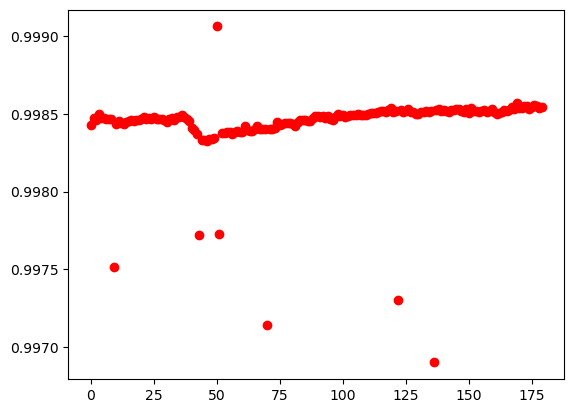

In [101]:
plt.plot(df2['Ne_Corr'].index, df2['Ne_Corr'], 'or')

In [102]:
Corr_Ne=103*df2['Ne_Corr']

In [103]:
Density=pf.calculate_density_cornell(temp='SupCrit', Split=Corr_Ne)

Text(0.5, 0, 'Acqusition #')

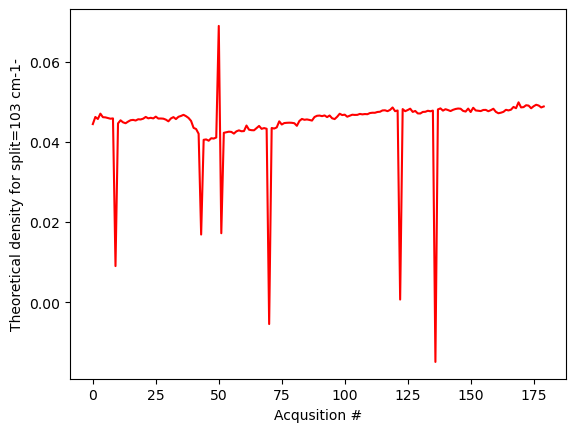

In [112]:
plt.plot(df2['Ne_Corr'].index, Density['Preferred D'], '-r')
plt.ylabel('Theoretical density for split=103 cm-1-')
plt.xlabel('Acqusition #')

## Loading time

In [107]:
path=r'G:\My Drive\Berkeley_NEW\Raman\2022_09_26_longNeLine1'
aranet=pd.read_excel(path+str('/')+'2022_09_26_27_LongNeLineAcqusiion.xls', sheet_name='Aranet')

In [108]:
aranet_t=aranet['time'].values
aranet_T=aranet['Temperature(Â°C)']

In [119]:
Raman_t=aranet_t[0]+(300+45*3)*df2.index/(24*60*60)

In [120]:
300*df2.index/(24*60*60)

Float64Index([                 0.0, 0.003472222222222222, 0.006944444444444444,
              0.010416666666666666, 0.013888888888888888, 0.017361111111111112,
              0.020833333333333332, 0.024305555555555556, 0.027777777777777776,
                           0.03125,
              ...
                0.5902777777777778,              0.59375,   0.5972222222222222,
                0.6006944444444444,   0.6041666666666666,   0.6076388888888888,
                0.6111111111111112,   0.6145833333333334,   0.6180555555555556,
                0.6215277777777778],
             dtype='float64', length=180)

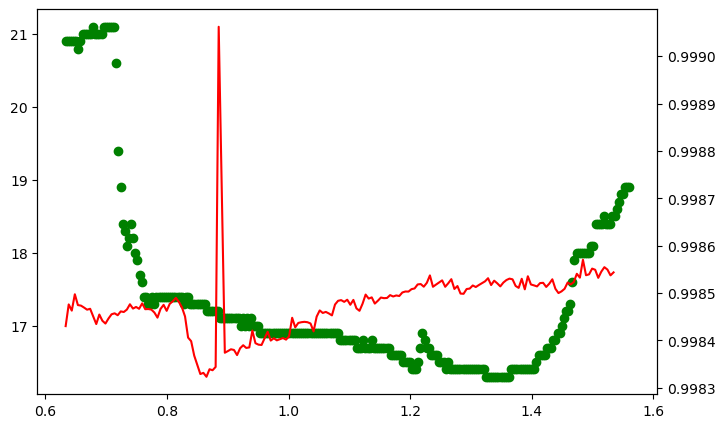

In [121]:
fig, (ax1) = plt.subplots(1, 1, figsize = (8,5))
ax1.plot(aranet_t, aranet_T, 'og')
ax2=ax1.twinx()
reas=df2['Ne_Corr'].between(0.998, 1)
ax2.plot(Raman_t[reas], df2['Ne_Corr'][reas], '-r')